## Important

Box-Cox and Yeo-Johnson transformations need to learn their parameters from the data. Therefore, as always, before attempting any transformation it is important to divide the dataset into train and test set.

In this demo, I will not do so for simplicity, but when using this transformation in your pipelines, please make sure you do so.


## In this demo

We will see how to implement variable transformations using Scikit-learn.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

from feature_engine import variable_transformers as vt

In [2]:
# load the data
#Brest_Cancer.csv
data = pd.read_csv('C:/Users/gusal/machine learning/Feature engineering/auto-mpg_rev1.csv')


## Plots to assess normality

To visualise the distribution of the variables, we plot a histogram and a Q-Q plot. In the Q-Q pLots, if the variable is normally distributed, the values of the variable should fall in a 45 degree line when plotted against the theoretical quantiles. We discussed this extensively in Section 3 of this course.

In [3]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    plt.xlabel(variable)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

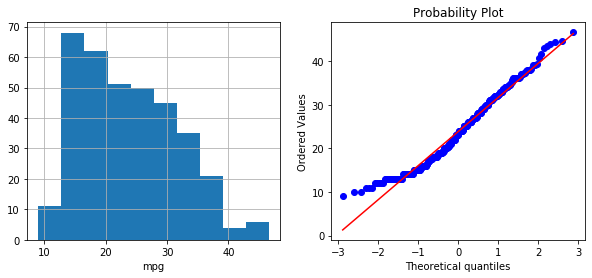

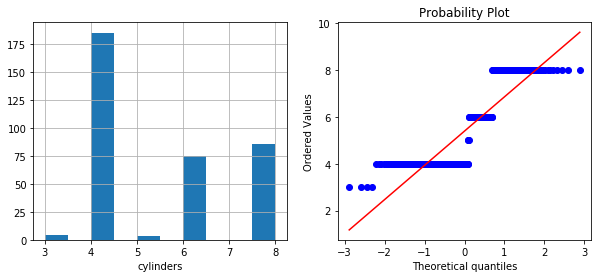

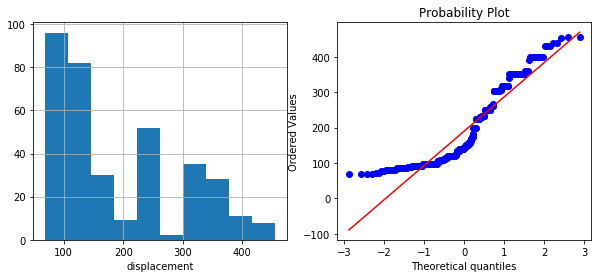

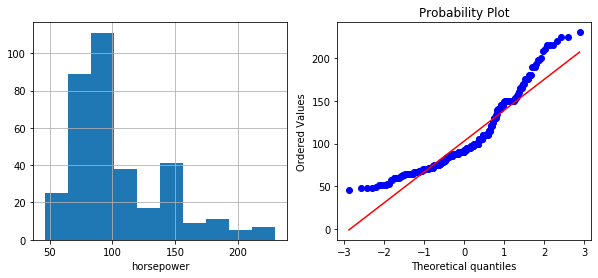

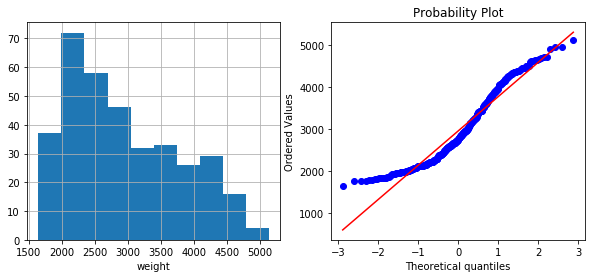

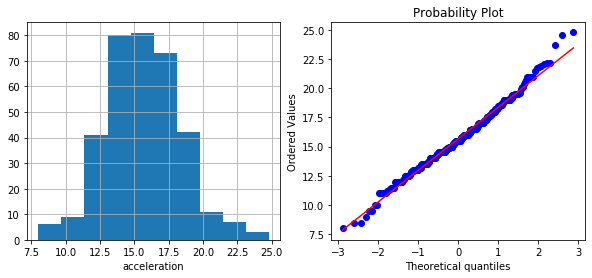

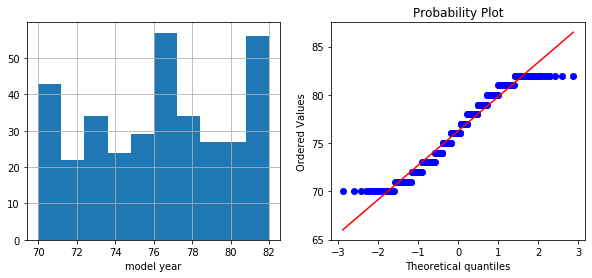

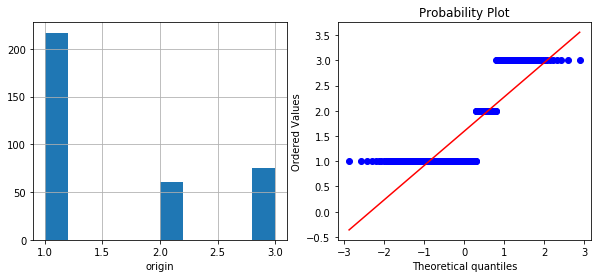

In [4]:
cols = data.columns

for var in cols:
    diagnostic_plots(data, var)

In [5]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

## LogTransformer

In [6]:
lt = vt.LogTransformer(variables = ['displacement', 'horsepower'])
lt.fit(data)

LogTransformer(base='e', variables=['displacement', 'horsepower'])

In [7]:
# variables that will be transformed
lt.variables

['displacement', 'horsepower']

In [8]:
data_tf = lt.transform(data)

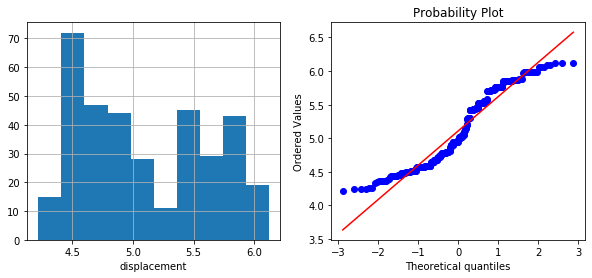

In [9]:
diagnostic_plots(data_tf, 'displacement')

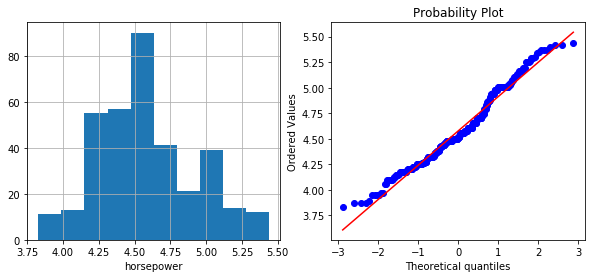

In [10]:
diagnostic_plots(data_tf, 'horsepower')

## ReciprocalTransformer

In [11]:
rt = vt.ReciprocalTransformer(variables = ['displacement', 'horsepower'])
rt.fit(data)

ReciprocalTransformer(variables=['displacement', 'horsepower'])

In [12]:
data_tf = rt.transform(data)

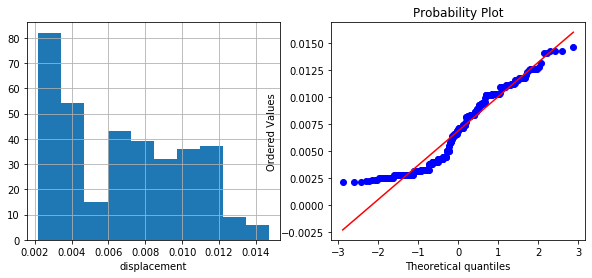

In [13]:
diagnostic_plots(data_tf, 'displacement')

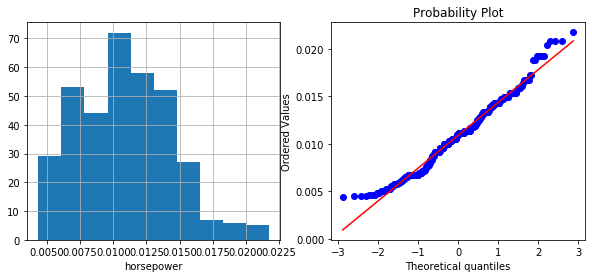

In [14]:
diagnostic_plots(data_tf, 'horsepower')

## ExponentialTransformer

In [15]:
et = vt.PowerTransformer(variables = ['displacement', 'horsepower'])
et.fit(data)

PowerTransformer(exp=0.5, variables=['displacement', 'horsepower'])

In [16]:
data_tf = et.transform(data)

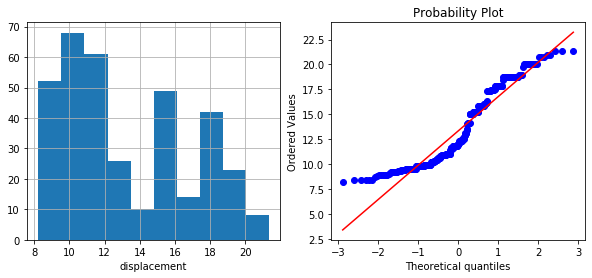

In [17]:
diagnostic_plots(data_tf, 'displacement')

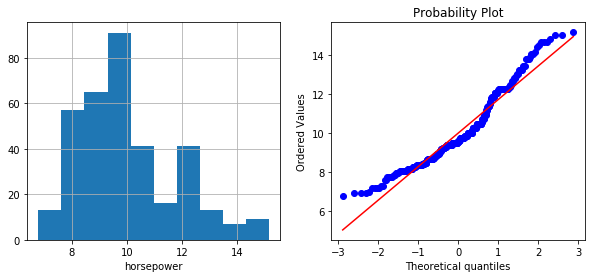

In [18]:
diagnostic_plots(data_tf, 'horsepower')

## BoxCoxTransformer

In [19]:
bct = vt.BoxCoxTransformer(variables = ['displacement', 'horsepower'])
bct.fit(data)

BoxCoxTransformer(variables=['displacement', 'horsepower'])

In [20]:
# these are the exponents for the BoxCox transformation
bct.lambda_dict_

{'displacement': -0.36662415872186804, 'horsepower': -0.5355853889439893}

In [21]:
data_tf = bct.transform(data)

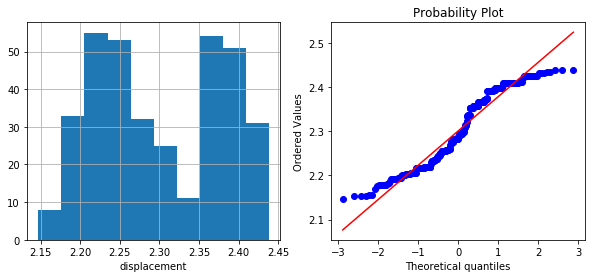

In [22]:
diagnostic_plots(data_tf, 'displacement')

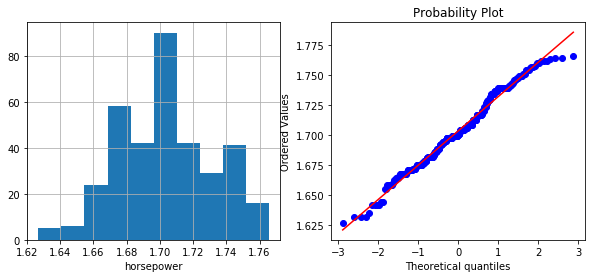

In [23]:
diagnostic_plots(data_tf, 'horsepower')

## Yeo-Johnson Transformer

Yeo-Johnson Transformer will be available in the next release of Feauture-Engine!!!

In [24]:
yjt = vt.YeoJohnsonTransformer(variables = ['displacement', 'horsepower'])
yjt.fit(data)

YeoJohnsonTransformer(variables=['displacement', 'horsepower'])

In [25]:
# these are the exponents for the Yeo-Johnson transformation
yjt.lambda_dict_

{'displacement': -0.3731545670663533, 'horsepower': -0.5511701397974301}

In [26]:
data_tf = yjt.transform(data)

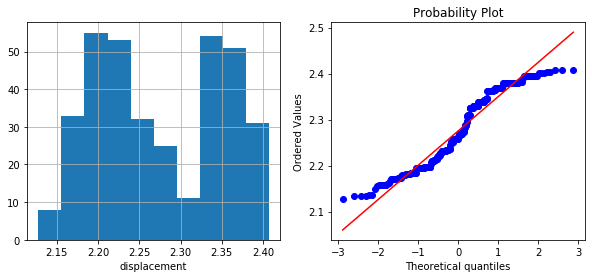

In [27]:
diagnostic_plots(data_tf, 'displacement')

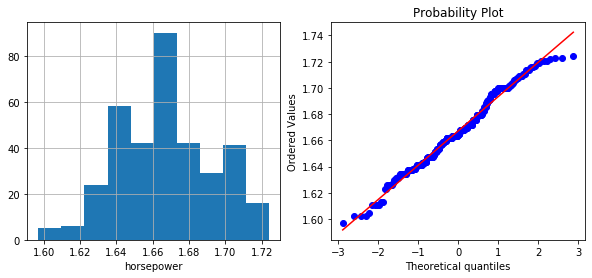

In [28]:
diagnostic_plots(data_tf, 'horsepower')